In [17]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bfn1005
working directory set to /home/hbkoziel/awi-models


In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [19]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('PuBu')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# type of plot
global_plot = True
arctic_plot = True
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id = 'tr01' #DIN

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [20]:
mesh = fesom_mesh(meshpath, get3d = get3d)
#mesh = load_mesh(meshpath)

Load 2d part of the grid in 3 second(s)


In [21]:
# Loading data from CSV Files
print 'loading...'
APR = genfromtxt(outputpath+'MLD_APR_1990_2015_mean.csv', delimiter=';')
print 'April...'
MAY = genfromtxt(outputpath+'MLD_MAY_1990_2015_mean.csv', delimiter=';')
print 'May...'
JUN = genfromtxt(outputpath+'DSI_JUN_1990_2015_mean.csv', delimiter=';')
print 'June...'
JUL = genfromtxt(outputpath+'MLD_JUL_1990_2015_mean.csv', delimiter=';')
print 'July...'
AUG = genfromtxt(outputpath+'MLD_AUG_1990_2015_mean.csv', delimiter=';')
print 'August...'
SEP = genfromtxt(outputpath+'MLD_SEP_1990_2015_mean.csv', delimiter=';')
print 'September...'

loading...
April...
May...
June...
July...
August...
September...


ftriplot, number of dummy points: 0
ftriplot, number of dummy points: 0
ftriplot, number of dummy points: 0
ftriplot, number of dummy points: 0
ftriplot, number of dummy points: 0
ftriplot, number of dummy points: 0


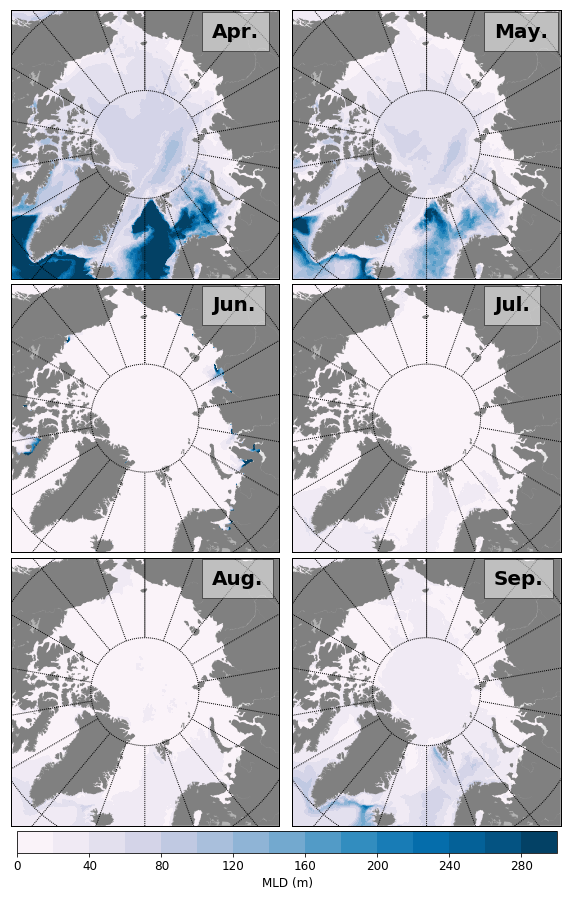

In [22]:
contours = [0, 300, 20]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])

fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
elem2=mesh.elem#[mesh.no_cyclic_elem,:]

ax1 = plt.subplot(3,2,1)
data2=APR
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('Apr.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax2 = plt.subplot(3,2,2)
data2=MAY
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('May.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax3 = plt.subplot(3,2,3)
data2=JUN
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('Jun.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})


ax4 = plt.subplot(3,2,4)
data2=JUL
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('Jul.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})


ax5 = plt.subplot(3,2,5)
data2=AUG
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('Aug.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})


ax6 = plt.subplot(3,2,6)
data2=SEP
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
plt.annotate('Sep.', xy=(0.75, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.14, 0.1, 0.75, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cb.set_label(label='MLD (m)', size='large')
cb.ax.tick_params(labelsize='large')

if export_plot == True:
    plt.savefig(savepath+'MLD_Climato_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight') 